In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load Seaborn Titanic dataset
data = sns.load_dataset('titanic')
data.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:

# Step 1: Preprocess the dataset
# Handle missing values - fill numerical columns with their median value and categorical with the mode
data['age'].fillna(data['age'].median(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
data.dropna(subset=['embarked', 'age'], inplace=True)  # Drop rows where critical info is missing

/tmp/ipykernel_48113/554549468.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
/tmp/ipykernel_48113/554549468.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [4]:
# Handle categorical features: Encoding 'sex' and 'embarked' as numbers
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['embarked'] = data['embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [5]:
# Step 2: Detect and remove outliers using IQR method
numerical_cols = ['age', 'fare']
for col in numerical_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier condition
    outlier_condition = (data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))
    # Remove outliers
    data = data[~outlier_condition]
    

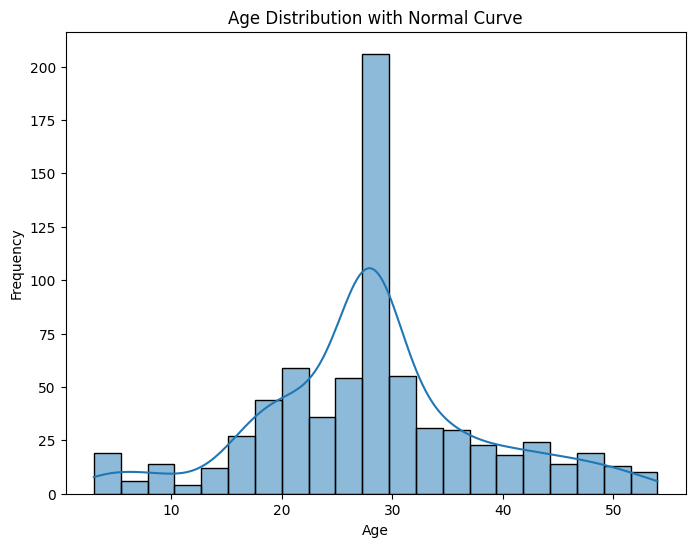

In [7]:
# Step 3: Normal Curves (Normal distribution curve for 'age' feature)
plt.figure(figsize=(8,6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution with Normal Curve')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

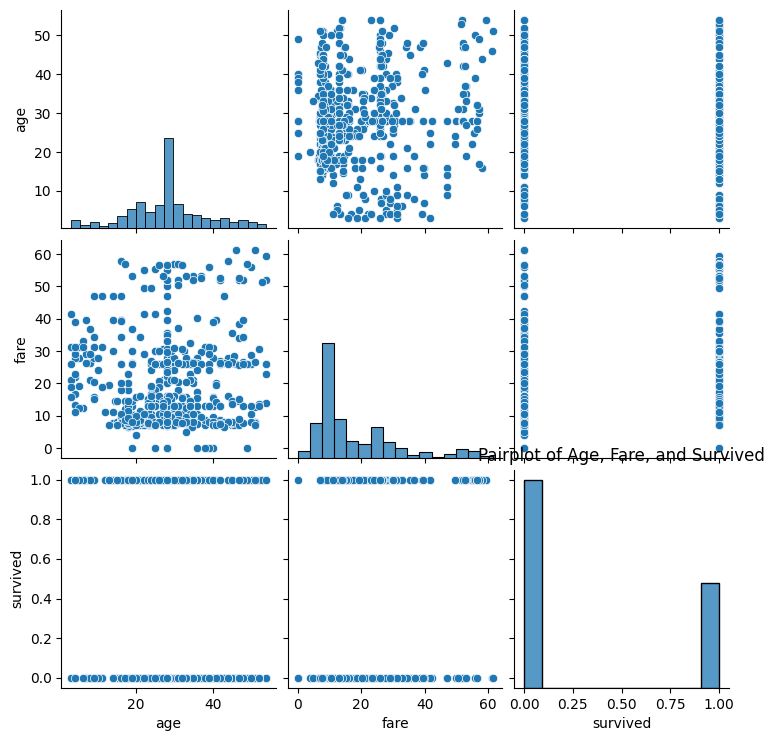

In [8]:
# Step 4: Data Visualization
# Visualization 1: Pairplot for data with only numerical columns
sns.pairplot(data[['age', 'fare', 'survived']])
plt.title('Pairplot of Age, Fare, and Survived')
plt.show()


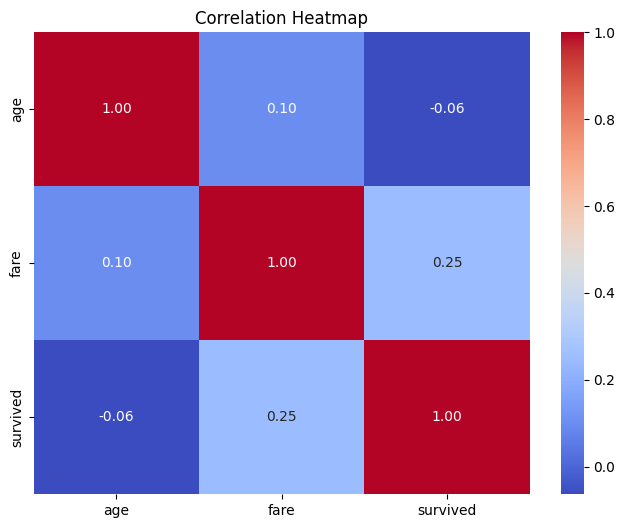

In [9]:
# Visualization 2: Heatmap of correlations between numerical columns
correlation_matrix = data[['age', 'fare', 'survived']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()